In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor

# Load the data
dft = pd.read_csv('data/train.csv').iloc[:,1:].copy()
df = dft.copy()

# Preprocess the data
df['BsmtFinSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2']
df['BsmtFinType'] = df['BsmtFinType1'].astype(bool) | df['BsmtFinType2'].astype(bool)
df = df.drop(columns=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2'])

df['MSSubClass']= df['MSSubClass'].astype(str)

# Adding total sqfootage feature 
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# Split the data into features and target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

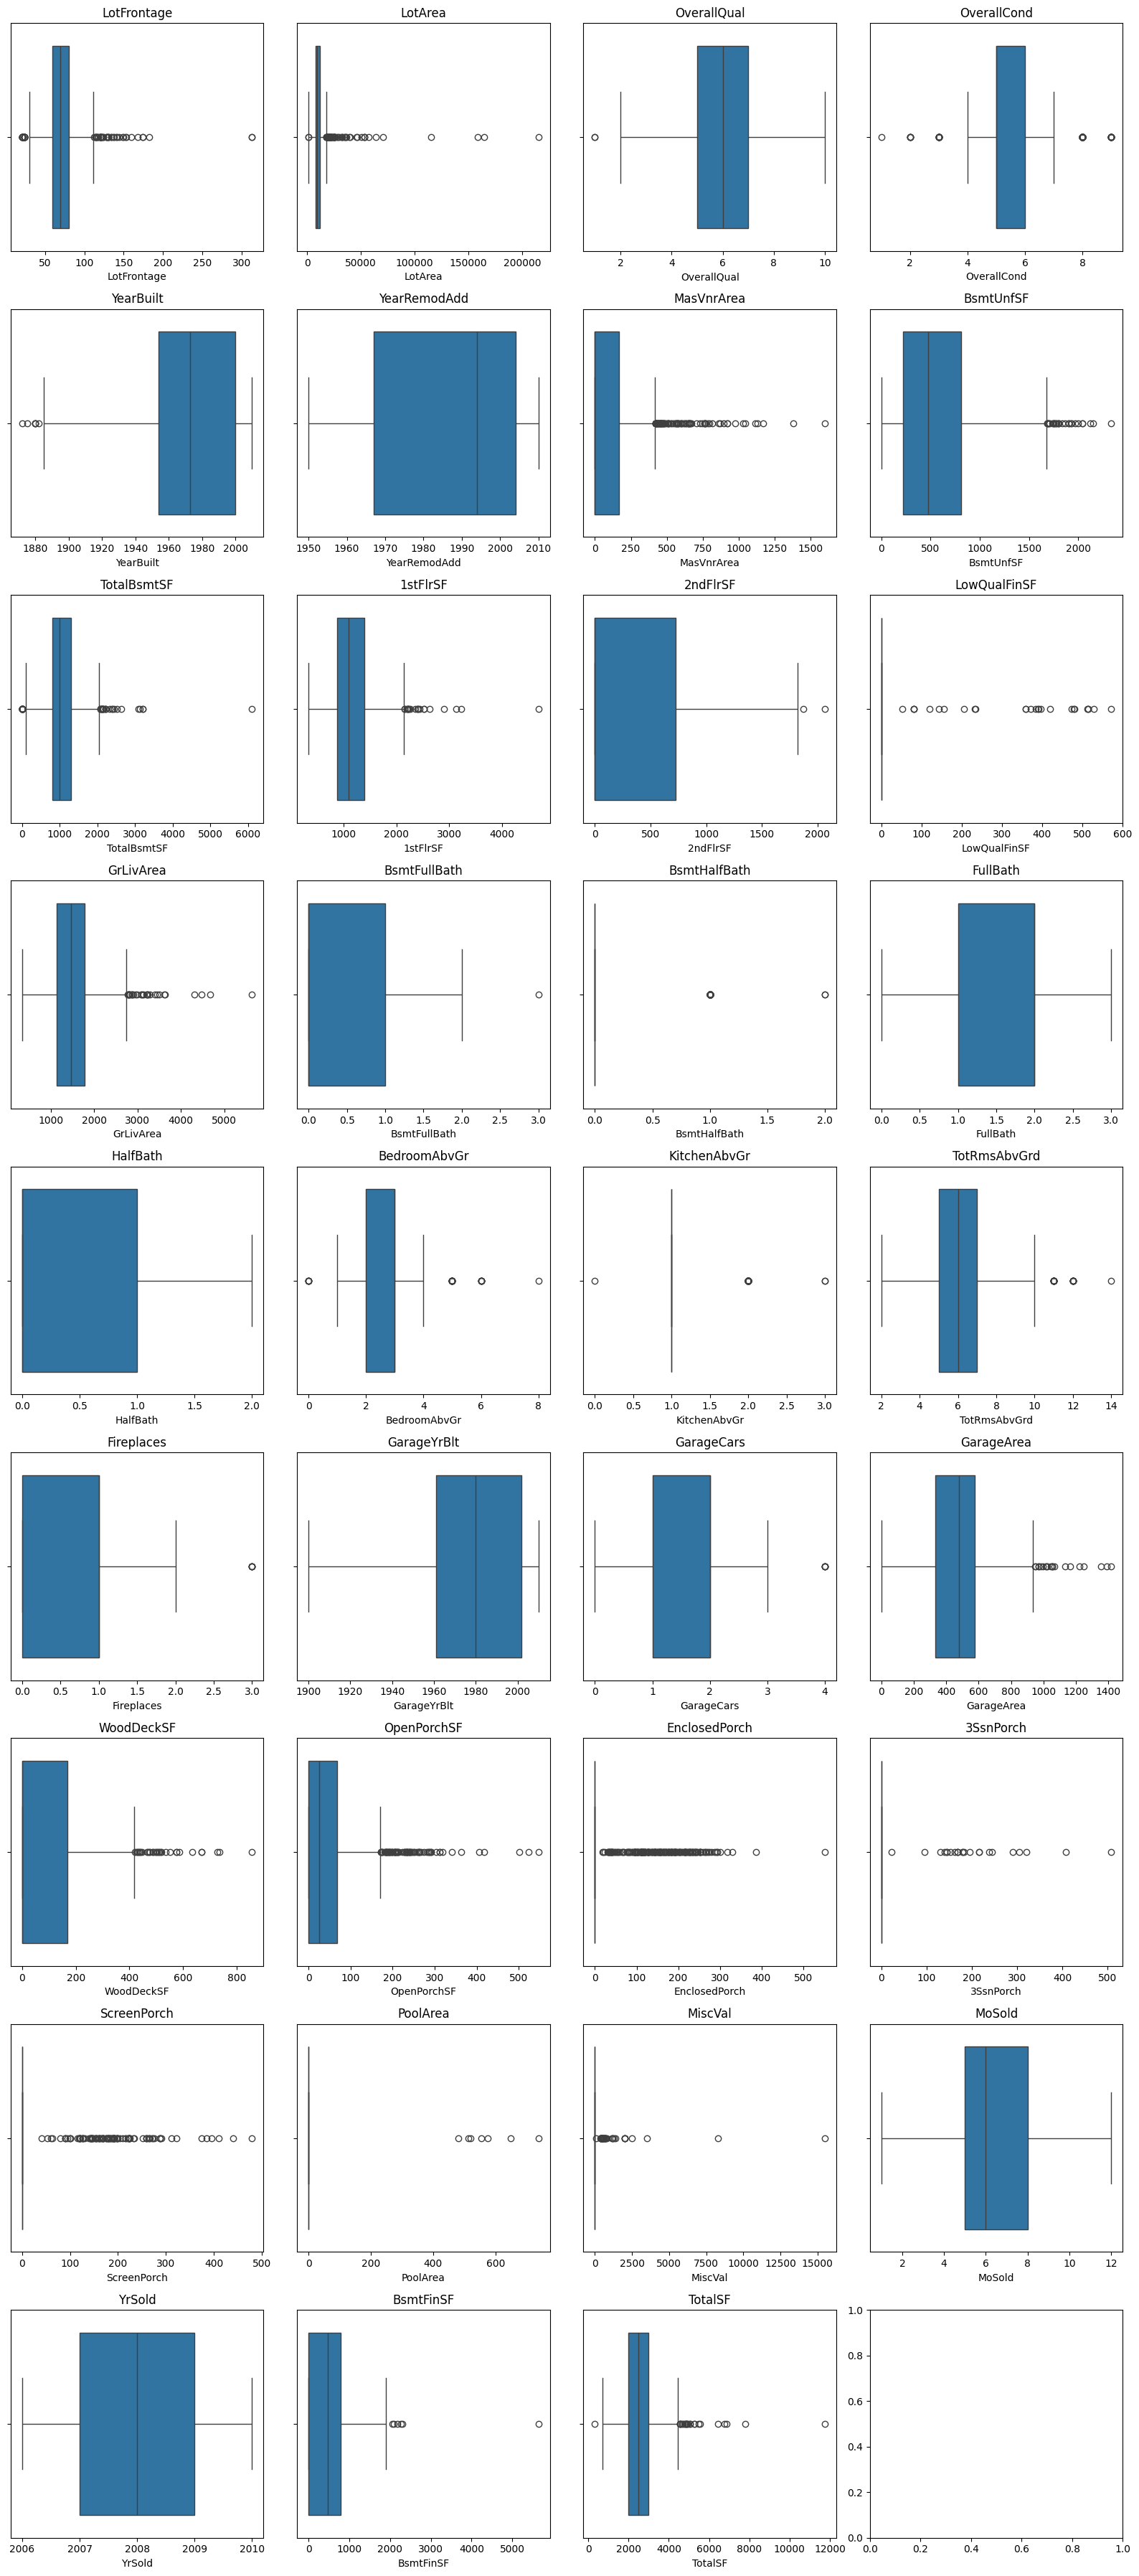

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

n = len(numerical_cols)
ncols = 4
nrows = n // ncols + (n % ncols != 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 4, nrows * 4))

for i, col in enumerate(numerical_cols):
    r, c = i // ncols, i % ncols
    ax = axes[r, c]
    sns.boxplot(x=X[col], ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

0:	learn: 80606.6823707	total: 156ms	remaining: 2m 35s
1:	learn: 78102.1648928	total: 162ms	remaining: 1m 20s
2:	learn: 75772.1880163	total: 167ms	remaining: 55.4s
3:	learn: 73438.0181467	total: 172ms	remaining: 42.8s
4:	learn: 71207.8956678	total: 175ms	remaining: 34.9s
5:	learn: 69206.3657215	total: 179ms	remaining: 29.6s
6:	learn: 67082.6714878	total: 182ms	remaining: 25.8s
7:	learn: 65343.6620742	total: 184ms	remaining: 22.8s
8:	learn: 63400.5390102	total: 186ms	remaining: 20.5s
9:	learn: 61733.0541229	total: 188ms	remaining: 18.6s
10:	learn: 60008.2838342	total: 190ms	remaining: 17.1s
11:	learn: 58450.5153825	total: 192ms	remaining: 15.8s
12:	learn: 56781.8530362	total: 195ms	remaining: 14.8s
13:	learn: 55244.3155162	total: 197ms	remaining: 13.9s
14:	learn: 53844.1022521	total: 199ms	remaining: 13.1s
15:	learn: 52536.9270168	total: 201ms	remaining: 12.4s
16:	learn: 51347.8852450	total: 203ms	remaining: 11.7s
17:	learn: 50288.6493085	total: 205ms	remaining: 11.2s
18:	learn: 49182.7

C:\Users\Nick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [12:01:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBRegressor
Mean Squared Error: 996923604.6917
------------------------------
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set

C:\Users\Nick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233717993899.89734, tolerance: 805980550.5365013
  model = cd_fast.sparse_enet_coordinate_descent(


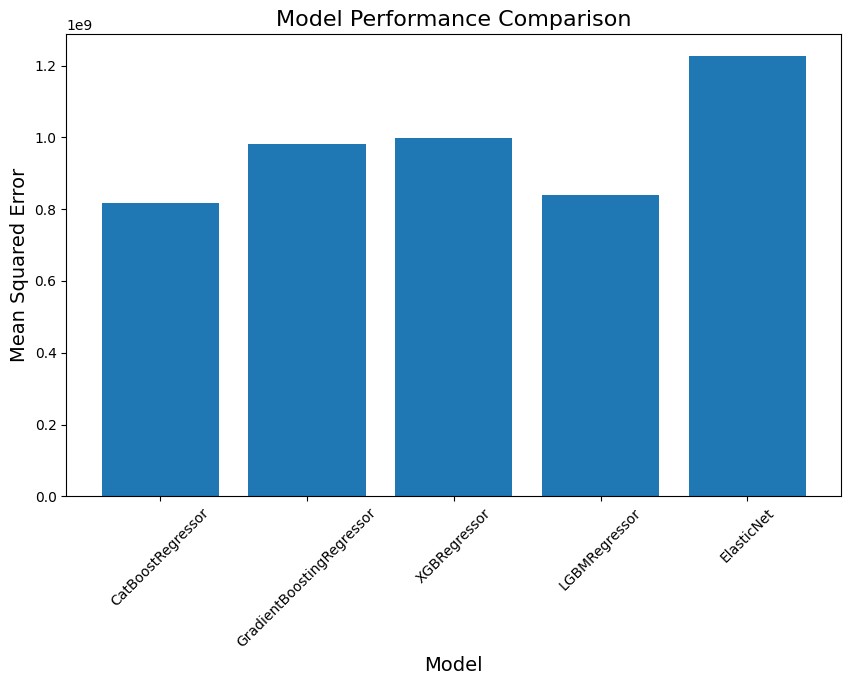

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

from sklearn.impute import SimpleImputer

# Create an imputer object for numerical features
numerical_imputer = SimpleImputer(strategy='mean')

# Create a pipeline for numerical features
numerical_transformer = make_pipeline(numerical_imputer, StandardScaler(with_mean=False))

categorical_transformer = OneHotEncoder(handle_unknown='ignore')


# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Identify columns for robust scaling
robust_scaler_cols = ['LotFrontage','LotArea','MasVnrArea','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','TotalSF']
standard_scaler_cols = [col for col in numerical_cols if col not in robust_scaler_cols]

# Create an imputer object for numerical features
numerical_imputer = SimpleImputer(strategy='mean')

# Create pipelines for each type of numerical features
robust_scaler_transformer = make_pipeline(numerical_imputer, RobustScaler())
standard_scaler_transformer = make_pipeline(numerical_imputer, StandardScaler(with_mean=False))

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num_robust', robust_scaler_transformer, robust_scaler_cols),
        ('num_standard', standard_scaler_transformer, standard_scaler_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)


models = [CatBoostRegressor(depth = 6,l2_leaf_reg=5, learning_rate= 0.05,verbose=1),
          GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=6, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =3),
        xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1),
        lgb.LGBMRegressor(objective='regression',num_leaves=6,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=18, bagging_seed=12,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11),
        ElasticNet(alpha=0.00055, l1_ratio=.905, random_state=2),
                             ]


from sklearn.metrics import mean_squared_error

# Define a list to store the mean squared errors
mse_values = []
model_predictions=[]
pipelines= []

for model in models:
    pipeline = make_pipeline(preprocessor, model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    model_predictions.append(pipeline.predict(X_test))
    pipelines.append(pipeline)
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print("-" * 30)

# Create a bar plot
model_names = [model.__class__.__name__ for model in models]
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.xticks(rotation=45)
plt.title('Model Performance Comparison', fontsize=16)
plt.show()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.tree import DecisionTreeRegressor


In [5]:
# Convert the predictions to a DataFrame
model_predictions = pd.DataFrame(model_predictions).T

# Create a decision tree regressor
decision_tree = DecisionTreeRegressor()

# Fit the decision tree on the model predictions
decision_tree.fit(model_predictions, y_test)

#Evaluate the decision tree regressor
y_pred_decision_tree = decision_tree.predict(model_predictions)
decision_tree_mse = mean_squared_error(y_test, y_pred_decision_tree)
print(f"Decision Tree Regressor:")
print(f"Mean Squared Error: {decision_tree_mse:.4f}")
print("-" * 30)

Decision Tree Regressor:
Mean Squared Error: 0.0000
------------------------------


In [6]:

random_for = RandomForestRegressor(max_depth=4,min_samples_leaf=4,min_samples_split=5,n_estimators=50
                                   )

# Fit the decision tree on the model predictions
random_for.fit(model_predictions, y_test)

#Evaluate the decision tree regressor
y_pred_random_for = random_for.predict(model_predictions)
random_for_mse = mean_squared_error(y_test, y_pred_random_for)
print(f"Random Forest Regressor:")
print(f"Mean Squared Error: {random_for_mse:.4f}")
print("-" * 30)

Random Forest Regressor:
Mean Squared Error: 311905643.3475
------------------------------


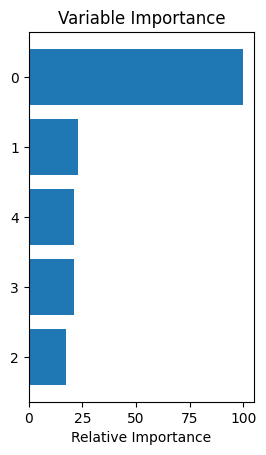

In [7]:
import matplotlib.pyplot as plt
import numpy as np

feature_importance = random_for.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(model_predictions.columns)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

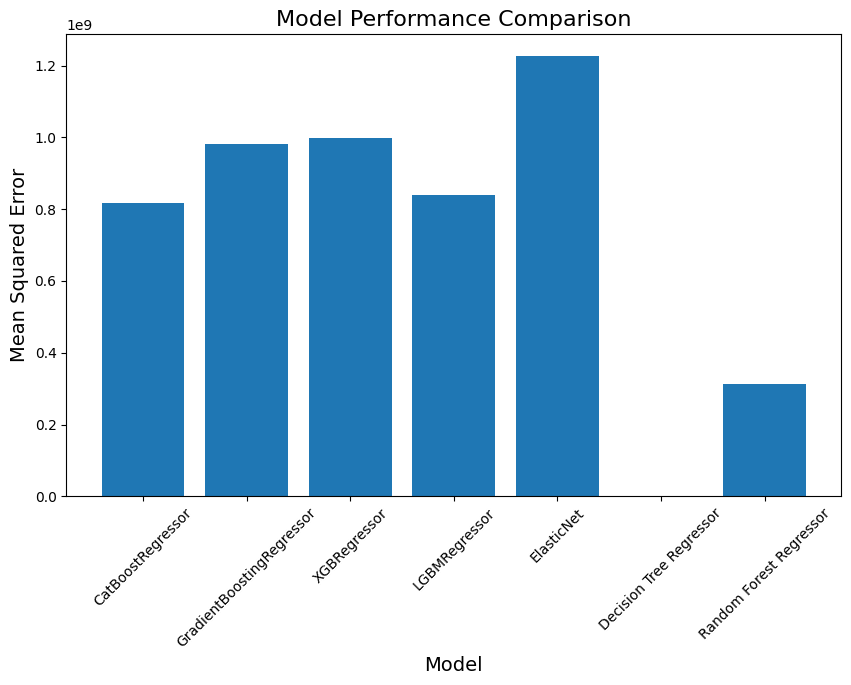

In [8]:
# Add the decision tree regressor to the list of models and MSE values
model_names.append("Decision Tree Regressor")
mse_values.append(decision_tree_mse)
# Add the decision tree regressor to the list of models and MSE values
model_names.append("Random Forest Regressor")
mse_values.append(random_for_mse)


# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.xticks(rotation=45)
plt.title('Model Performance Comparison', fontsize=16)
plt.show()

In [9]:
# Load the data
dftest = pd.read_csv('data/test.csv').iloc[:,1:].copy()

# Preprocess the data
dftest['BsmtFinSF'] = dftest['BsmtFinSF1'] + dftest['BsmtFinSF2']
dftest['BsmtFinType'] = dftest['BsmtFinType1'].astype(bool) | dftest['BsmtFinType2'].astype(bool)
dftest = dftest.drop(columns=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2'])
# Adding total sqfootage feature 
dftest['TotalSF'] = dftest['TotalBsmtSF'] + dftest['1stFlrSF'] + dftest['2ndFlrSF']
dftest['MSSubClass']= dftest['MSSubClass'].astype(str)
# Recreate the ColumnTransformer using the entire dataset
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a list to store the predictions of each base model
base_model_predictions = []

# Make predictions using the base models and store the predictions
for i,model in enumerate(models):  # exclude the decision tree regressor and average blender
    print(model)

    preds=pipelines[i].predict(dftest)
    base_model_predictions.append(preds)



GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=6,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=3)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4603, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0468, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1.7817, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2200, n_jobs=None, nthread=-1,
             num_parallel_tree=None, ...)
LGBMReg

In [10]:
# Convert the base model predictions to a DataFrame
base_model_predictions = pd.DataFrame(base_model_predictions).T

# Make predictions using the decision tree regressor
final_pred = random_for.predict(base_model_predictions)

In [11]:
# Load the data
dft= pd.read_csv('data/test.csv')
pd.Series(index=dft['Id'],data=final_pred).rename('SalePrice').to_csv('submissions/submission_03232025_8.csv')